In [2]:
from random import randint
import numpy as np

xGrad = 5
yGrad = 7

noiseSd = .05

x = []
y = []
z = []

for i in range(100):
    x_element = randint(1, 200)
    y_element = randint(1, 200)
    x.append(x_element)
    y.append(y_element)
    noise = np.random.normal(0, scale=50)
    z.append(xGrad * x_element + yGrad * y_element + noise)

In [3]:
z

[1647.2500390782288,
 1449.6632637524142,
 1645.9600122529573,
 164.15898692305421,
 1443.916555527655,
 731.0446705724895,
 874.992974398767,
 1802.6803962969725,
 535.0007726682084,
 1334.565979711259,
 1677.4270673714796,
 1249.2000501219409,
 1565.218990887812,
 1319.932880518242,
 544.7595033776381,
 991.4854332278794,
 1311.399070413441,
 1727.385666786843,
 1887.8771731904114,
 1550.3455456316044,
 1507.905206414721,
 1646.087047692981,
 2041.422779937161,
 894.0921885801185,
 2149.5614920665225,
 1412.1222731988832,
 1295.4689661818682,
 1039.2661378219282,
 2079.8167857817925,
 651.7594181530021,
 1895.4535442867661,
 570.6161473303258,
 1601.2172978245114,
 385.4614777180185,
 890.3551019514084,
 1529.8674216191923,
 1606.2744272374694,
 1131.422956041525,
 1225.5377492887594,
 607.3542330483114,
 1602.5929219413526,
 1042.2262794653284,
 1879.6458719251984,
 932.1315576430009,
 1087.9983792747867,
 2040.7377835072339,
 783.3319173055536,
 2196.9706874911285,
 740.64805722899

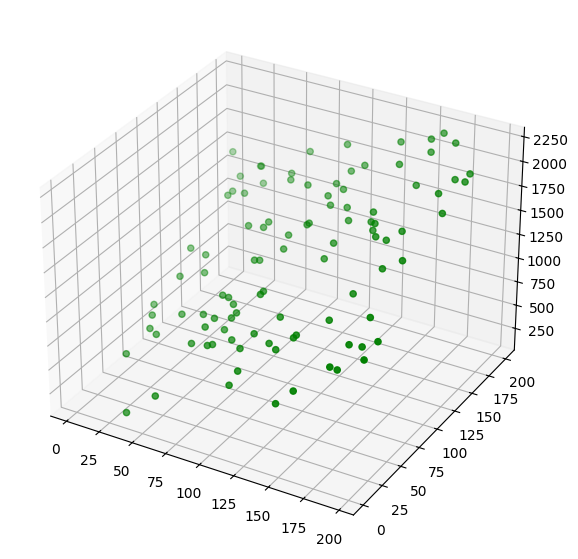

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
 
# show plot
plt.show()

# typo algorythm


In [6]:
from sklearn.datasets import load_digits

digits = load_digits()

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

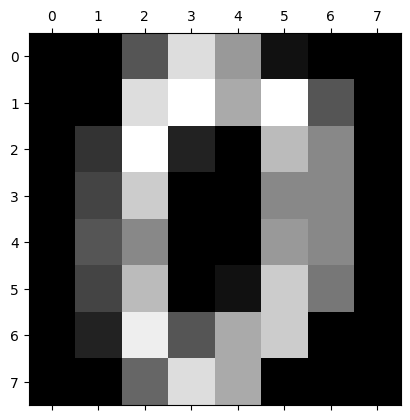

In [9]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [10]:
from sklearn.decomposition import PCA

pca = PCA(3)
projected = pca.fit_transform(digits.data)  

In [11]:
projected.data.shape

(1797, 3)

Text(0, 0.5, 'cumulative explained variance')

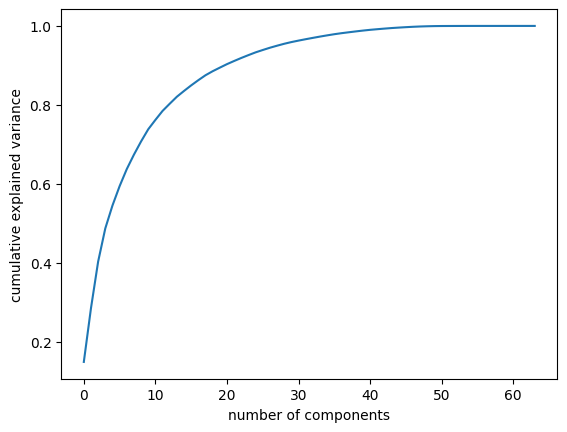

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

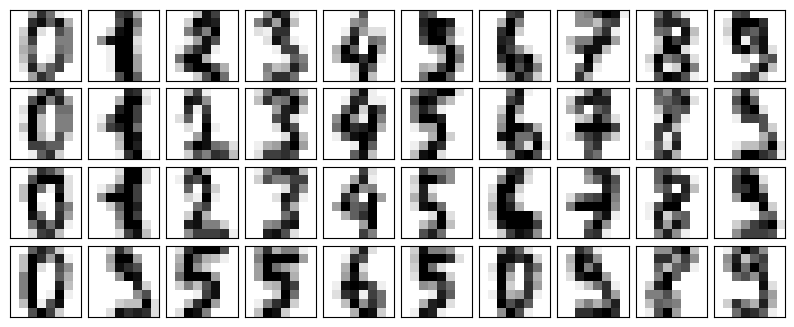

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        

plot_digits(digits.data)

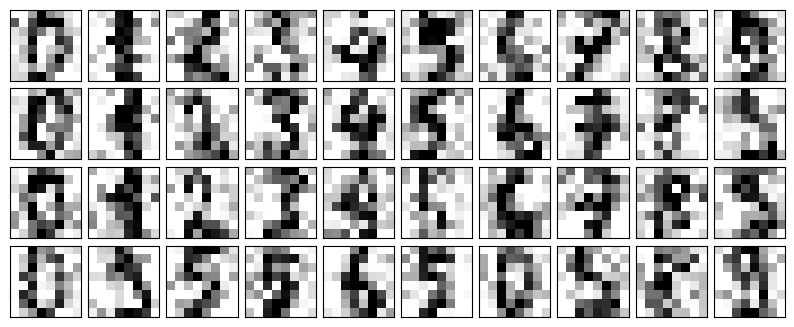

In [14]:
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [16]:
pca = PCA(0.50).fit(noisy)
print(pca.n_components_)

12


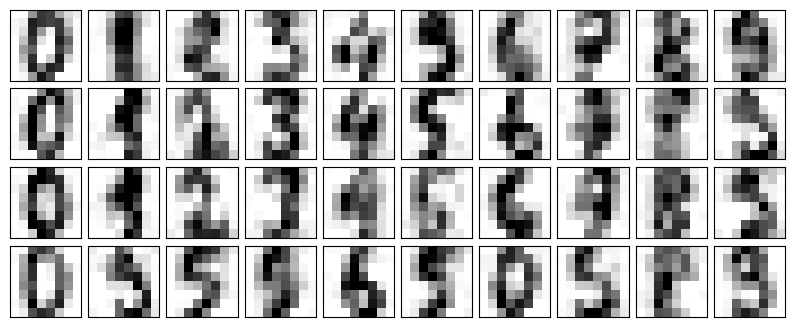

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [18]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


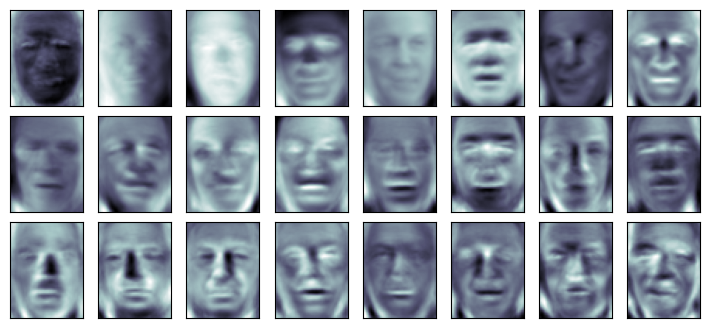

In [19]:
pca = PCA(150, svd_solver='randomized')
pca = pca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


Text(0, 0.5, 'cumulative explained variance')

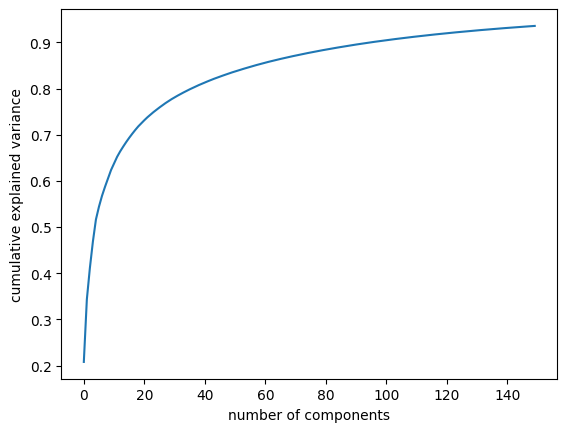

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [21]:
pca = PCA(90).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

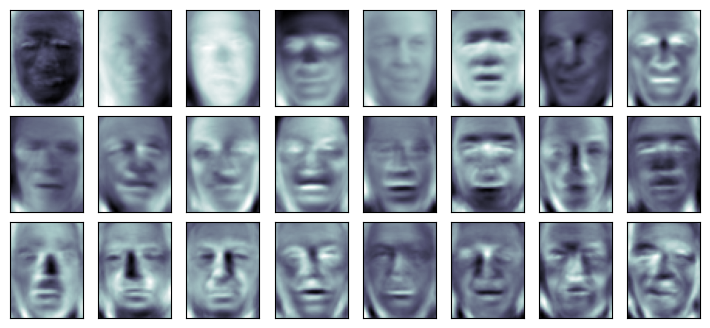

In [22]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')